In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
##from tqdm import tqdm


#   creates image training database
#   all images with same labels in separate folders
#   also images in grayscale
#    
#

def create_training_data(DATADIR,CATEGORIES):
    
    training_data = []
    
    for category in CATEGORIES:  # 

        i = 0
        path = os.path.join(DATADIR,category)  # create path to samples labelwise
        class_num = CATEGORIES.index(category)  # get the classification

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                
                img_array = cv2.resize(img_array, (100, 100))## size image is morphed to
                
                training_data.append([img_array, class_num])  # add this to our training_data
                
                i+=1
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            if(i>2000):
                break
    return training_data    




DATADIR = "data/"
CATEGORIES = ["neutral", "smile"]

training_data = create_training_data(DATADIR,CATEGORIES)

DATADIR = "data/test/"

testing_data = create_training_data(DATADIR,CATEGORIES)

print(len(training_data))
print(len(testing_data))


937
257


In [2]:
import random

random.shuffle(training_data)
X = []
Y = []
for features,label in training_data:
    X.append(features)
    Y.append(label)
    
# shuffle data to make it sorted    
    
random.shuffle(testing_data)
Xtest = []
Ytest = []
for features,label in testing_data:
    Xtest.append(features)
    Ytest.append(label)    
    

1


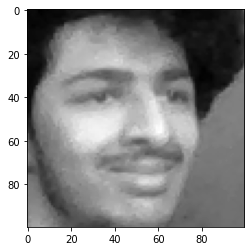

In [9]:
plt.imshow(training_data[69][0], cmap='gray')  # graph it
print(training_data[69][1])
plt.show()  # display!    

In [10]:
X = np.array(X).reshape(-1, 100, 100, 1)

Y = np.array(Y) 


Xtest = np.array(Xtest).reshape(-1, 100, 100, 1)

Ytest = np.array(Ytest)   

In [ ]:
import pickle

pickle_out = open('X.pickle','wb')
    
pickle.dump(X,pickle_out)
pickle_out.close()


pickle_out = open('y.pickle','wb')
    
pickle.dump(Y,pickle_out)
pickle_out.close()


pickle_out = open('X_t.pickle','wb')
    
pickle.dump(Xtest,pickle_out)
pickle_out.close()


pickle_out = open('y_t.pickle','wb')
    
pickle.dump(Ytest,pickle_out)
pickle_out.close()